In [8]:
# Step 1 - Dataset Preparation
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

In [9]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Split the dataset into training (80%) and testing (20%) sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [10]:

# Normalize pixel values to be between 0 and 1
x_train, x_val, x_test = x_train / 255.0, x_val / 255.0, x_test / 255.0

In [11]:
# Step 2 - Model Architecture and Training
model_cnn = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [12]:
# Compile the model
model_cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# Train the model
history_cnn = model_cnn.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))


Epoch 1/10
750/750 [==============================] - 16s 21ms/step - loss: 0.3139 - accuracy: 0.9059 - val_loss: 0.1018 - val_accuracy: 0.9712
Epoch 2/10
750/750 [==============================] - 15s 20ms/step - loss: 0.1282 - accuracy: 0.9624 - val_loss: 0.0674 - val_accuracy: 0.9798
Epoch 3/10
750/750 [==============================] - 14s 19ms/step - loss: 0.0957 - accuracy: 0.9712 - val_loss: 0.0619 - val_accuracy: 0.9825
Epoch 4/10
750/750 [==============================] - 14s 19ms/step - loss: 0.0787 - accuracy: 0.9765 - val_loss: 0.0525 - val_accuracy: 0.9849
Epoch 5/10
750/750 [==============================] - 14s 19ms/step - loss: 0.0642 - accuracy: 0.9801 - val_loss: 0.0517 - val_accuracy: 0.9843
Epoch 6/10
750/750 [==============================] - 16s 21ms/step - loss: 0.0549 - accuracy: 0.9828 - val_loss: 0.0478 - val_accuracy: 0.9867
Epoch 7/10
750/750 [==============================] - 15s 20ms/step - loss: 0.0494 - accuracy: 0.9842 - val_loss: 0.0455 - val_accuracy:

In [15]:
# Evaluate the model on the test set
test_loss_cnn, test_accuracy_cnn = model_cnn.evaluate(x_test, y_test)

print(f'Test accuracy: {test_accuracy_cnn}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0418 - accuracy: 0.9872
Test accuracy: 0.9872000217437744


In [16]:
# Check for Underfitting and Overfitting (added section)
if min(history_cnn.history['val_loss']) > 0.2:
    print("CNN model may be underfitting. Validation loss is relatively high.")
elif history_cnn.history['loss'][-1] > 0.2 and history_cnn.history['val_loss'][-1] > 0.2:
    print("CNN model may be overfitting. Training and validation loss are both relatively high.")
else:
    print("No Underfitting or Overfitting Detected!")

No Underfitting or Overfitting Detected!


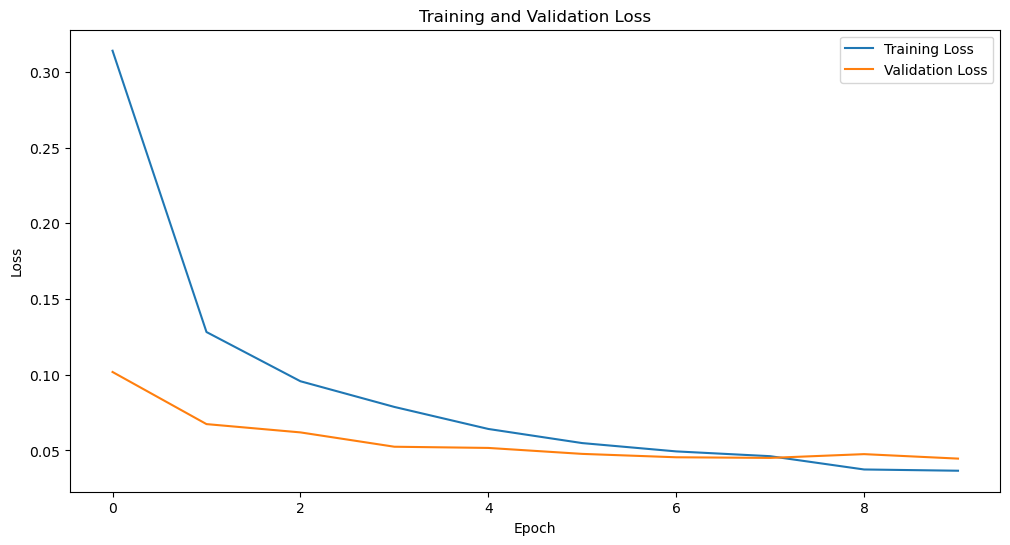

In [17]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history_cnn.history['loss'], label='Training Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## VGG19 for Transfer Learning with MINST

In [18]:
# Using VGG19 for Transfer Learning with MNIST
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
import numpy as np
import cv2

In [19]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Resize images to (48, 48) and simulate RGB channels
x_train = [cv2.cvtColor(cv2.resize(image, (48, 48)), cv2.COLOR_GRAY2RGB) for image in x_train]
x_test = [cv2.cvtColor(cv2.resize(image, (48, 48)), cv2.COLOR_GRAY2RGB) for image in x_test]

In [20]:
# Convert to NumPy arrays
x_train = np.array(x_train)
x_test = np.array(x_test)

# Split the dataset into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [21]:
# Preprocess pixel values to be in the range [0, 1]
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

In [22]:
# Load the pre-trained VGG19 model (without the top classification layer)
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Freeze the convolutional layers to prevent them from being updated during training
for layer in base_model.layers:
    layer.trainable = False

In [23]:
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(10, activation='softmax')(x)

In [24]:
vgg_model = Model(inputs=base_model.input, outputs=output)

In [25]:
# Compile the model
vgg_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [26]:
# Train the model
history_vgg = vgg_model.fit(x_train, y_train, epochs=3, batch_size=64, validation_data=(x_val, y_val))

Epoch 1/3
750/750 [==============================] - 331s 441ms/step - loss: 0.6000 - accuracy: 0.8242 - val_loss: 0.2040 - val_accuracy: 0.9441
Epoch 2/3
750/750 [==============================] - 337s 449ms/step - loss: 0.2458 - accuracy: 0.9281 - val_loss: 0.1438 - val_accuracy: 0.9563
Epoch 3/3
750/750 [==============================] - 323s 431ms/step - loss: 0.1892 - accuracy: 0.9439 - val_loss: 0.1215 - val_accuracy: 0.9640


In [28]:
# Evaluate the model on the test set
test_loss_vgg, test_accuracy_vgg = vgg_model.evaluate(x_test, y_test)

print(f'Test accuracy: {test_accuracy_vgg}')

313/313 [==============================] - 54s 174ms/step - loss: 0.1139 - accuracy: 0.9661
Test accuracy: 0.9660999774932861


In [29]:
# Check for Underfitting and Overfitting (added section)
if min(history_vgg.history['val_loss']) > 0.2:
    print("CNN model may be underfitting. Validation loss is relatively high.")
elif history_vgg.history['loss'][-1] > 0.2 and history_cnn.history['val_loss'][-1] > 0.2:
    print("CNN model may be overfitting. Training and validation loss are both relatively high.")
else:
    print("No Underfitting or Overfitting Detected!")

No Underfitting or Overfitting Detected!


In [30]:
#Model Evaluation
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

## Model Comparison (CNN v VGG19)

In [39]:
# Print the test accuracy of both models
print("Test accuracy for CNN model:", test_accuracy_cnn)
print("Test accuracy for VGG19-based model:", test_accuracy_vgg)

Test accuracy for CNN model: 0.9872000217437744
Test accuracy for VGG19-based model: 0.9660999774932861


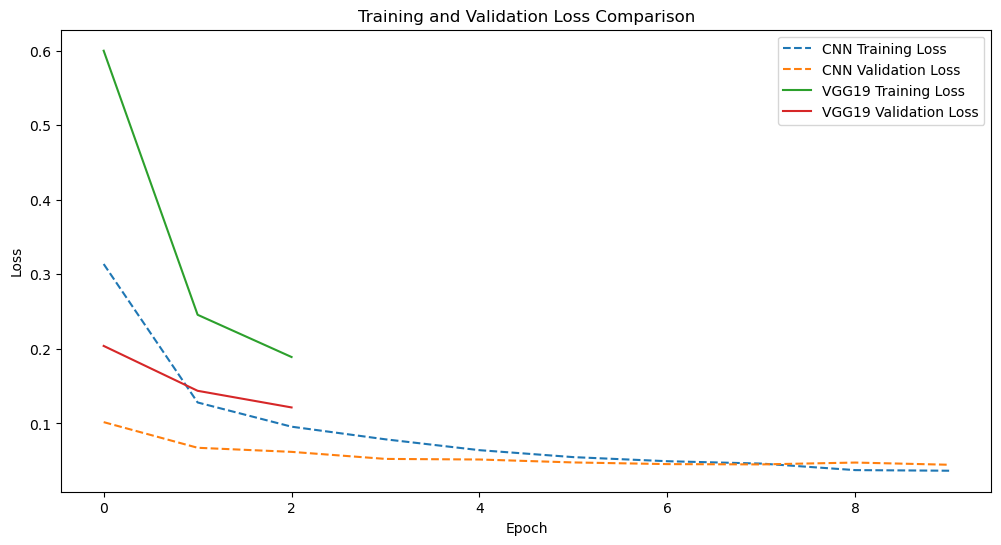

In [40]:
# Compare and visualize the training and validation loss for both models
plt.figure(figsize=(12, 6))
plt.plot(history_cnn.history['loss'], label='CNN Training Loss', linestyle='--')
plt.plot(history_cnn.history['val_loss'], label='CNN Validation Loss', linestyle='--')
plt.plot(history_vgg.history['loss'], label='VGG19 Training Loss')
plt.plot(history_vgg.history['val_loss'], label='VGG19 Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss Comparison')
plt.show()

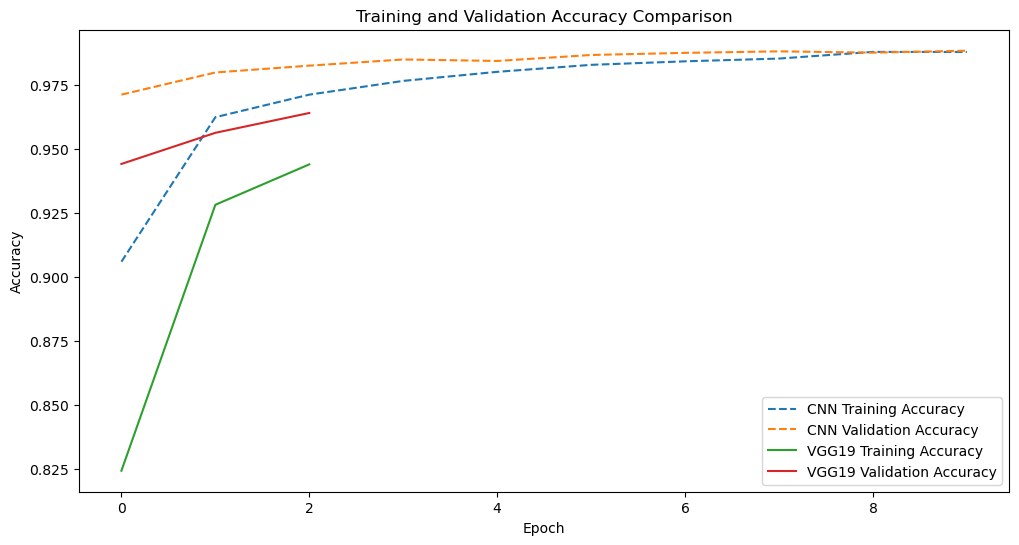

In [41]:
# Compare and visualize the training and validation accuracy for both models
plt.figure(figsize=(12, 6))
plt.plot(history_cnn.history['accuracy'], label='CNN Training Accuracy', linestyle='--')
plt.plot(history_cnn.history['val_accuracy'], label='CNN Validation Accuracy', linestyle='--')
plt.plot(history_vgg.history['accuracy'], label='VGG19 Training Accuracy')
plt.plot(history_vgg.history['val_accuracy'], label='VGG19 Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy Comparison')
plt.show()

In [42]:
# Check for Underfitting and Overfitting condition for both models
def check_fit(history, model_name):
    if min(history.history['val_loss']) > 0.2:
        print(f"{model_name} may be underfitting. Validation loss is relatively high.")
    elif history.history['loss'][-1] > 0.2 and history.history['val_loss'][-1] > 0.2:
        print(f"{model_name} may be overfitting. Training and validation loss are both relatively high.")
    else:
        print(f"No Underfitting or Overfitting Detected for {model_name}!")

In [43]:
# Check for Underfitting and Overfitting
check_fit(history_cnn, "CNN Model")
check_fit(history_vgg, "VGG19-based Model")

No Underfitting or Overfitting Detected for CNN Model!
No Underfitting or Overfitting Detected for VGG19-based Model!
